<a href="https://colab.research.google.com/github/patience9kyalo/CitizenConnect360-frontend/blob/main/Statistical_Analysis_and_Unsupervised_Hierarchical_Clustering_for_the__MAT_TST__Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectives:**

To identify patterns and trends in HIV testing, client demographics, and linkage to care among the tested population using statistical analysis.

To apply Hierarchical Clustering techniques to group clients based on testing behaviors, demographic factors, and care linkage status to uncover distinct client profiles and insights for targeted interventions.


## Data Exploration and Preparation ##



1.   Data Preprocessing:

Handling Missing Values: Assess the dataset for missing or incomplete values. Handle missing data through imputation (e.g., mean or median for numerical data, mode for categorical data) or by excluding rows/columns with excessive missing values if appropriate.

Encoding Categorical Variables: Convert categorical variables (e.g., sex, marital status, key population type, HIV test result, linked to care status) into numerical formats using one-hot encoding or label encoding.

Normalization and Scaling: Normalize or standardize numerical features like age and months since the last test to ensure uniformity in data and enhance the performance of clustering algorithms.




In [ ]:
#Importing necessary libraries
import pandas as pd

In [ ]:
#Read the dataset
df = pd.read_csv('MAT.csv.csv')
df.head(40)

,Date (YYYY/MM/DD),Age,Sex,Marital status(S/MM/MP/D/W),Ever Tested?,Client tested as,Strategy (HP/NP/VI/VS/HB/MO/O),Entry Point,"HIV Test 1 Kit Name: , Lot No. , Expiry ,(N,P,I) , (q),\n",Final Result,Final Result Given?,TB Screening,Ever had an HIV self test this year (Y/N)
0,8/4/2022,26,F,MM,Yes,Individual,HP,PMTCT MAT,Determine\n____________\n13121K200A\n_________...,Negative,Yes,No TB signs,No
1,8/11/2022,30,F,MM,Yes,Individual,HP,PMTCT MAT,Determine\n____________\n13121k200R\n_________...,Negative,Yes,No TB signs,Yes
2,9/29/2022,33,F,MM,Yes,Individual,HP,PMTCT MAT,Determine\n____________\n13121K200R\n_________...,Negative,Yes,No TB signs,No
3,10/6/2022,22,F,MM,Yes,Individual,HP,PMTCT MAT,Determine\n____________\n13121k200r\n_________...,Negative,Yes,No TB signs,No
4,11/1/2022,22,F,MM,No,Individual,HP,PMTCT MAT,Determine\n____________\n18168K200R\n_________...,Negative,Yes,No TB signs,No
5,11/1/2022,20,F,MM,No,Individual,HP,PMTCT MAT,Determine\n____________\n18168K200R\n_________...,Negative,Yes,No TB signs,No
6,11/1/2022,31,F,MM,No,Individual,HP,PMTCT MAT,Determine\n____________\n18168K200R\n_________...,Negative,Yes,No TB signs,No
7,11/1/2022,20,F,MM,No,Individual,HP,PMTCT MAT,Determine\n____________\n18168K200R\n_________...,Negative,Yes,No TB signs,No
8,11/1/2022,20,F,MM,No,Individual,HP,PMTCT MAT,Determine\n____________\n18168k200R\n_________...,Negative,Yes,No TB signs,No
9,1/3/2023,37,F,MM,No,Individual,HP,PMTCT MAT,Determine\n____________\n18168k200r\n_________...,Positive,Yes,No TB signs,No


In [ ]:
#Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 13 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   Date (YYYY/MM/DD)                                                         1337 non-null   object
 1   Age                                                                       1337 non-null   int64 
 2   Sex                                                                       1337 non-null   object
 3   Marital status(S/MM/MP/D/W)                                               1337 non-null   object
 4   Ever Tested?                                                              1337 non-null   object
 5   Client tested as                                                          1337 non-null   object
 6   Strategy (HP/NP/VI/VS/HB/MO/O)                                          

In [ ]:
df.describe()

,Age
count,1337.000000
mean,27.323859
std,6.528769
min,13.000000
25%,22.000000
50%,26.000000
75%,32.000000
max,65.000000


In [ ]:
df.shape

(1337, 13)

In [ ]:
df.columns

Index(['Date (YYYY/MM/DD)', 'Age', 'Sex', 'Marital status(S/MM/MP/D/W)',
       'Ever Tested?', 'Client tested as', 'Strategy (HP/NP/VI/VS/HB/MO/O)',
       'Entry Point',
       'HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           ',
       'Final Result', 'Final Result Given?', 'TB Screening',
       'Ever had an HIV self test this year (Y/N)'],
      dtype='object')

In [ ]:
#Check for missing values in the dataset
df.isnull().sum()

,0
Date (YYYY/MM/DD),0
Age,0
Sex,0
Marital status(S/MM/MP/D/W),0
Ever Tested?,0
Client tested as,0
Strategy (HP/NP/VI/VS/HB/MO/O),0
Entry Point,0
"HIV Test 1 Kit Name: , Lot No. , Expiry ,(N,P,I) , (q),\n",0
Final Result,0


## Converting categorical columns to numeric inputs. ##

In [ ]:
# Apply one-hot encoding for columns with two inputs.

df['TB Screening'] = pd.get_dummies(df['TB Screening'], dtype=int, drop_first=True)

df['Ever Tested?'] = pd.get_dummies(df['Ever Tested?'], dtype=int, drop_first=True)

df['Final Result'] = pd.get_dummies(df['Final Result'], dtype=int, drop_first=True)

df['Ever had an HIV self test this year (Y/N)'] = pd.get_dummies(df['Ever had an HIV self test this year (Y/N)'], dtype=int, drop_first=True)

df.head(60)

,Date (YYYY/MM/DD),Age,Sex,Marital status(S/MM/MP/D/W),Ever Tested?,Client tested as,Strategy (HP/NP/VI/VS/HB/MO/O),Entry Point,"HIV Test 1 Kit Name: , Lot No. , Expiry ,(N,P,I) , (q),\n",Final Result,Final Result Given?,TB Screening,Ever had an HIV self test this year (Y/N)
0,8/4/2022,26,F,MM,1,Individual,HP,PMTCT MAT,Determine\n____________\n13121K200A\n_________...,0,Yes,0,0
1,8/11/2022,30,F,MM,1,Individual,HP,PMTCT MAT,Determine\n____________\n13121k200R\n_________...,0,Yes,0,1
2,9/29/2022,33,F,MM,1,Individual,HP,PMTCT MAT,Determine\n____________\n13121K200R\n_________...,0,Yes,0,0
3,10/6/2022,22,F,MM,1,Individual,HP,PMTCT MAT,Determine\n____________\n13121k200r\n_________...,0,Yes,0,0
4,11/1/2022,22,F,MM,0,Individual,HP,PMTCT MAT,Determine\n____________\n18168K200R\n_________...,0,Yes,0,0
5,11/1/2022,20,F,MM,0,Individual,HP,PMTCT MAT,Determine\n____________\n18168K200R\n_________...,0,Yes,0,0
6,11/1/2022,31,F,MM,0,Individual,HP,PMTCT MAT,Determine\n____________\n18168K200R\n_________...,0,Yes,0,0
7,11/1/2022,20,F,MM,0,Individual,HP,PMTCT MAT,Determine\n____________\n18168K200R\n_________...,0,Yes,0,0
8,11/1/2022,20,F,MM,0,Individual,HP,PMTCT MAT,Determine\n____________\n18168k200R\n_________...,0,Yes,0,0
9,1/3/2023,37,F,MM,0,Individual,HP,PMTCT MAT,Determine\n____________\n18168k200r\n_________...,1,Yes,0,0


In [ ]:
#Apply Label Encoding for columns with more than 2 inputs.

df["Marital status(S/MM/MP/D/W)"] = pd.factorize(df["Marital status(S/MM/MP/D/W)"])[0]

df["Strategy (HP/NP/VI/VS/HB/MO/O)"] = pd.factorize(df["Strategy (HP/NP/VI/VS/HB/MO/O)"])[0]

df["HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           "] = pd.factorize(df["HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           "])[0]

df["Sex"] = pd.factorize(df["Sex"])[0]

df["Entry Point"] = pd.factorize(df["Entry Point"])[0]

df["Final Result Given?"] = pd.factorize(df["Final Result Given?"])[0]

df["Client tested as"] = pd.factorize(df["Client tested as"])[0]


df.head(10)

,Date (YYYY/MM/DD),Age,Sex,Marital status(S/MM/MP/D/W),Ever Tested?,Client tested as,Strategy (HP/NP/VI/VS/HB/MO/O),Entry Point,"HIV Test 1 Kit Name: , Lot No. , Expiry ,(N,P,I) , (q),\n",Final Result,Final Result Given?,TB Screening,Ever had an HIV self test this year (Y/N)
0,8/4/2022,26,0,0,1,0,0,0,0,0,0,0,0
1,8/11/2022,30,0,0,1,0,0,0,1,0,0,0,1
2,9/29/2022,33,0,0,1,0,0,0,2,0,0,0,0
3,10/6/2022,22,0,0,1,0,0,0,3,0,0,0,0
4,11/1/2022,22,0,0,0,0,0,0,4,0,0,0,0
5,11/1/2022,20,0,0,0,0,0,0,4,0,0,0,0
6,11/1/2022,31,0,0,0,0,0,0,4,0,0,0,0
7,11/1/2022,20,0,0,0,0,0,0,4,0,0,0,0
8,11/1/2022,20,0,0,0,0,0,0,5,0,0,0,0
9,1/3/2023,37,0,0,0,0,0,0,6,1,0,0,0


In [ ]:
#Normalizing continuous variables like age using standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])
df.head(60)

,Date (YYYY/MM/DD),Age,Sex,Marital status(S/MM/MP/D/W),Ever Tested?,Client tested as,Strategy (HP/NP/VI/VS/HB/MO/O),Entry Point,"HIV Test 1 Kit Name: , Lot No. , Expiry ,(N,P,I) , (q),\n",Final Result,Final Result Given?,TB Screening,Ever had an HIV self test this year (Y/N)
0,8/4/2022,-0.202849,0,0,1,0,0,0,0,0,0,0,0
1,8/11/2022,0.410053,0,0,1,0,0,0,1,0,0,0,1
2,9/29/2022,0.869730,0,0,1,0,0,0,2,0,0,0,0
3,10/6/2022,-0.815751,0,0,1,0,0,0,3,0,0,0,0
4,11/1/2022,-0.815751,0,0,0,0,0,0,4,0,0,0,0
5,11/1/2022,-1.122202,0,0,0,0,0,0,4,0,0,0,0
6,11/1/2022,0.563279,0,0,0,0,0,0,4,0,0,0,0
7,11/1/2022,-1.122202,0,0,0,0,0,0,4,0,0,0,0
8,11/1/2022,-1.122202,0,0,0,0,0,0,5,0,0,0,0
9,1/3/2023,1.482632,0,0,0,0,0,0,6,1,0,0,0


In [ ]:
# dropping some features
df.drop(['Date (YYYY/MM/DD)'], axis=1, inplace=True)
df.head(60)

,Age,Sex,Marital status(S/MM/MP/D/W),Ever Tested?,Client tested as,Strategy (HP/NP/VI/VS/HB/MO/O),Entry Point,"HIV Test 1 Kit Name: , Lot No. , Expiry ,(N,P,I) , (q),\n",Final Result,Final Result Given?,TB Screening,Ever had an HIV self test this year (Y/N)
0,-0.202849,0,0,1,0,0,0,0,0,0,0,0
1,0.410053,0,0,1,0,0,0,1,0,0,0,1
2,0.869730,0,0,1,0,0,0,2,0,0,0,0
3,-0.815751,0,0,1,0,0,0,3,0,0,0,0
4,-0.815751,0,0,0,0,0,0,4,0,0,0,0
5,-1.122202,0,0,0,0,0,0,4,0,0,0,0
6,0.563279,0,0,0,0,0,0,4,0,0,0,0
7,-1.122202,0,0,0,0,0,0,4,0,0,0,0
8,-1.122202,0,0,0,0,0,0,5,0,0,0,0
9,1.482632,0,0,0,0,0,0,6,1,0,0,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'Marital status(S/MM/MP/D/W)', 'Ever Tested?',
       'Client tested as', 'Strategy (HP/NP/VI/VS/HB/MO/O)', 'Entry Point',
       'HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           ',
       'Final Result', 'Final Result Given?', 'TB Screening',
       'Ever had an HIV self test this year (Y/N)'],
      dtype='object')

In [ ]:
# dropping some features
df.drop(['Client tested as'], axis=1, inplace=True)
df.drop(['Strategy (HP/NP/VI/VS/HB/MO/O)'], axis=1, inplace=True)
df.drop(['Entry Point'], axis=1, inplace=True)
df.drop(['Final Result Given?'], axis=1, inplace=True)
df.drop(['Final Result'], axis=1, inplace=True)
df.drop(['TB Screening'], axis=1, inplace=True)
df.head(60)

,Age,Sex,Marital status(S/MM/MP/D/W),Ever Tested?,"HIV Test 1 Kit Name: , Lot No. , Expiry ,(N,P,I) , (q),\n",Ever had an HIV self test this year (Y/N)
0,-0.202849,0,0,1,0,0
1,0.410053,0,0,1,1,1
2,0.869730,0,0,1,2,0
3,-0.815751,0,0,1,3,0
4,-0.815751,0,0,0,4,0
5,-1.122202,0,0,0,4,0
6,0.563279,0,0,0,4,0
7,-1.122202,0,0,0,4,0
8,-1.122202,0,0,0,5,0
9,1.482632,0,0,0,6,0


## Statistical Analysis ##
**Descriptive Statistics:**

Calculate descriptive statistics for continuous variables like age.

Use frequency counts and proportions for categorical variables, such as sex, marital status, Ever Tested, HIV test result, and Ever had an HIV self test this year (Y/N).



In [ ]:
# Compute summary statistics for Age.
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]  # mode() returns a Series, so we take the first element
range_age = df['Age'].max() - df['Age'].min()
std_dev_age = df['Age'].std()

# Displaying the statistics
summary_stats = {
    "Mean Age": mean_age,
    "Median Age": median_age,
    "Mode Age": mode_age,
    "Range of Age": range_age,
    "Standard Deviation of Age": std_dev_age
}
summary_stats

{'Mean Age': 2.0726377482904943e-16,
 'Median Age': -0.20284906906404676,
 'Mode Age': -0.5093001485427257,
 'Range of Age': 7.967728066445652,
 'Standard Deviation of Age': 1.0003741814911118}

In [ ]:
#frequency analysis for residence
sex_counts = df['Sex'].value_counts()
print(sex_counts)

Sex
0    1337
Name: count, dtype: int64


In [ ]:
marital_counts = df['Marital status(S/MM/MP/D/W)'].value_counts()
print(marital_counts)

Marital status(S/MM/MP/D/W)
0    1124
1     168
3      27
2      18
Name: count, dtype: int64


In [ ]:
evertested_counts = df['Ever Tested?'].value_counts()
print(evertested_counts)

Ever Tested?
1    999
0    338
Name: count, dtype: int64


In [ ]:
hivresults_counts = df['HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           '].value_counts()
print(hivresults_counts)

HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           
60     150
66     130
20      95
62      78
92      74
      ... 
45       1
44       1
43       1
40       1
119      1
Name: count, Length: 120, dtype: int64


In [ ]:
everhadhiv_counts = df['Ever had an HIV self test this year (Y/N)'].value_counts()
print(everhadhiv_counts)

Ever had an HIV self test this year (Y/N)
0    1327
1      10
Name: count, dtype: int64


**Correlation Analysis:**
Exploring correlations between continuous variables using correlation coefficients (Pearson, Spearman).

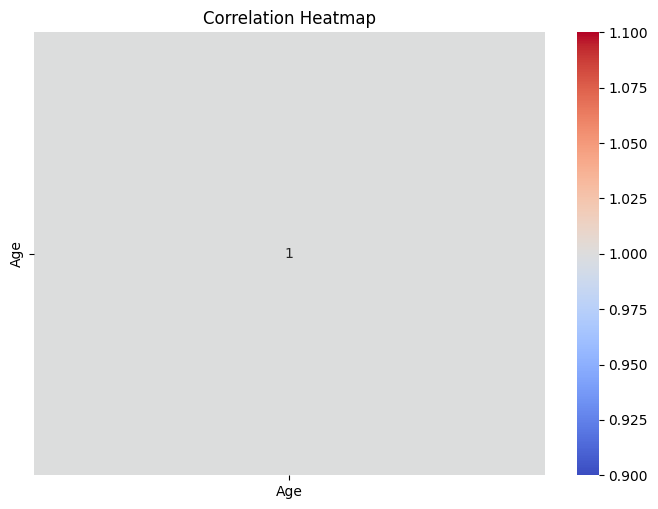

In [ ]:
#correlation matrix for continuous variables in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of subplots with appropriate size
fig, axes = plt.subplots(5, 3, figsize=(20, 24))  # 5 rows, 3 columns

# Select only the subplot you need and remove the others
df_subset = df[['Age']].copy()
corr_matrix = df_subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap')

# Remove unused subplots
for i in range(5):
    for j in range(3):
        if (i, j) != (1, 0):
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()


In [ ]:
#generating a chi-square test for the following variables, residence,diagnosis , delivery complication, status of baby, sex of child, and referral.

import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical variables to test
categorical_vars = ['Sex', 'Marital status(S/MM/MP/D/W)', 'Ever Tested?', 'HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           ']

# Function to perform chi-square test and print results
def perform_chi2_test(df, cat_var):
    # Create a contingency table
    contingency_table = pd.crosstab(df[cat_var], df['Ever had an HIV self test this year (Y/N)'])
    # Perform chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    # Print results
    print(f"Chi-square Test for {cat_var} and 'Ever had an HIV self test this year (Y/N)':")
    print("Chi-square Statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies Table:\n", expected)

    # Interpret results
    alpha = 0.05  # Significance level
    if p_val < alpha:
        print(f"There is a significant association between '{cat_var}' and 'Ever had an HIV self test this year (Y/N)'.")
    else:
        print(f"There is no significant association between '{cat_var}' and 'Ever had an HIV self test this year (Y/N)'.")
    print("\n")

# Run the test for each categorical variable
for var in categorical_vars:
    perform_chi2_test(df, var)

Chi-square Test for Sex and 'Ever had an HIV self test this year (Y/N)':
Chi-square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies Table:
 [[1327.   10.]]
There is no significant association between 'Sex' and 'Ever had an HIV self test this year (Y/N)'.


Chi-square Test for Marital status(S/MM/MP/D/W) and 'Ever had an HIV self test this year (Y/N)':
Chi-square Statistic: 0.4340441496574923
P-value: 0.9331233665744787
Degrees of Freedom: 3
Expected Frequencies Table:
 [[1.11559312e+03 8.40688108e+00]
 [1.66743455e+02 1.25654450e+00]
 [1.78653702e+01 1.34629768e-01]
 [2.67980553e+01 2.01944652e-01]]
There is no significant association between 'Marital status(S/MM/MP/D/W)' and 'Ever had an HIV self test this year (Y/N)'.


Chi-square Test for Ever Tested? and 'Ever had an HIV self test this year (Y/N)':
Chi-square Statistic: 0.5637256346990567
P-value: 0.4527630105282878
Degrees of Freedom: 1
Expected Frequencies Table:
 [[335.47195213   2.52804787]
 [991.52804787

**These were my findings,**

With a Chi-square statistic of 0.0, a p-value of 1.0, and degrees of freedom of 0, there is no significant association between sex and having had an HIV self-test this year.

With a Chi-square statistic of 0.434, a p-value of 0.933, and 3 degrees of freedom, there is no significant association between marital status and having had an HIV self-test this year.

With a Chi-square statistic of 0.564, a p-value of 0.453, and 1 degree of freedom, there is no significant association between prior HIV testing and having had an HIV self-test this year.

With a Chi-square statistic of 347.51, a p-value of 3.14e-24, and 119 degrees of freedom, there is a significant association between the HIV test kit used and whether a person has had an HIV self-test this year. This indicates a strong relationship between the kit used and testing behavior.

## Hierarchical Clustering ##

**Model Selection:**

Using hierarchical clustering algorithms to group clients based on similarities in their age and clinical characteristics.

Choosing an appropriate distance metric (e.g., Euclidean, Manhattan) to measure similarities between clients.

Selecting a linkage method (e.g., single, complete, average, ward) to determine how clusters are merged during the clustering process.

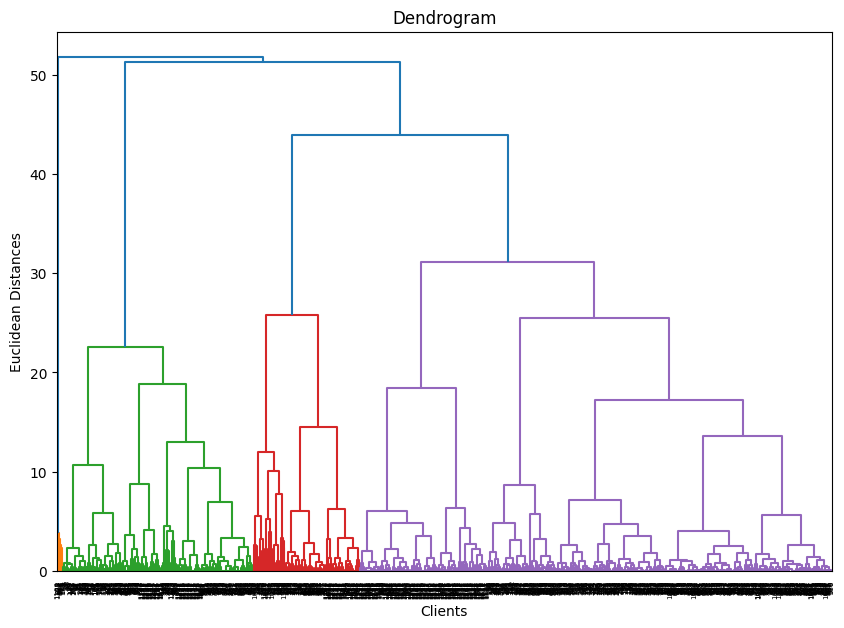

        Age  Sex  Marital status(S/MM/MP/D/W)  Ever Tested?  \
0 -0.202849    0                            0             1   
1  0.410053    0                            0             1   
2  0.869730    0                            0             1   
3 -0.815751    0                            0             1   
4 -0.815751    0                            0             0   

   HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n             \
0                                                  0                           
1                                                  1                           
2                                                  2                           
3                                                  3                           
4                                                  4                           

   Ever had an HIV self test this year (Y/N)  Cluster  
0                                          0        0  
1                           

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Selecting the relevant columns (features) for clustering
X = df[['Age', 'Sex', 'Marital status(S/MM/MP/D/W)', 'Ever Tested?', 'HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           ', 'Ever had an HIV self test this year (Y/N)']]
df.head(10)

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Plot Dendrogram to visualize cluster formation and decide the number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))  # Ward linkage method as default
plt.title('Dendrogram')
plt.xlabel('Clients')
plt.ylabel('Euclidean Distances')
plt.show()

# Step 3: Perform Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit and predict the clusters
y_cluster = cluster.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = y_cluster

# View the resulting DataFrame with clusters
print(df.head())

# Step 4: Calculate and print Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_cluster)
print(f"Silhouette Score: {silhouette_avg}")



Cluster 0: Individuals in Cluster 0 seem to have slightly below-average age, have tested for HIV, and mostly have not self-tested this year.

Cluster 1: This group may represent slightly younger or average-aged individuals who have both tested for HIV and self-tested this year.

Cluster 2: Likely individuals who are below average in age and have not been tested for HIV, nor self-tested this year.

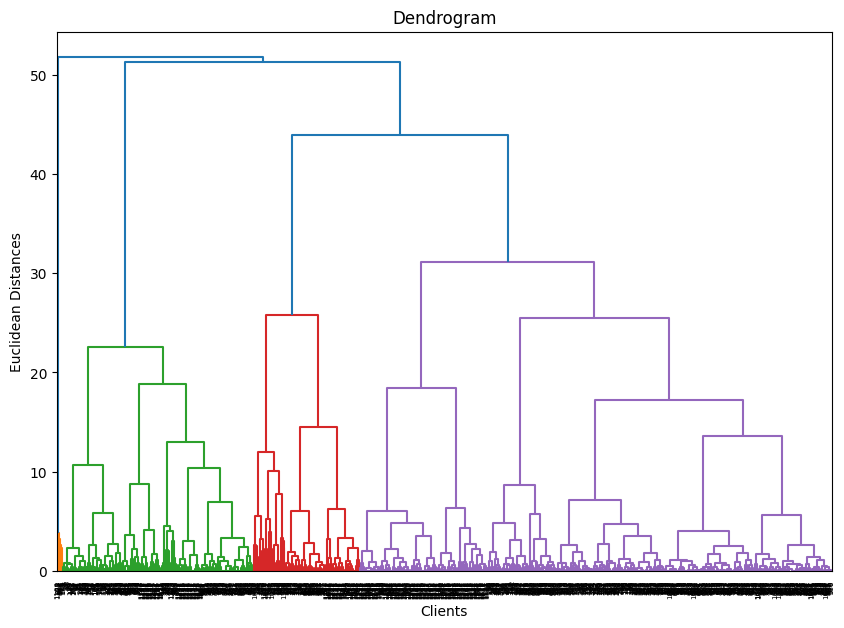

         Age  Sex  Marital status(S/MM/MP/D/W)  Ever Tested?  \
0  -0.202849    0                            0             1   
1   0.410053    0                            0             1   
2   0.869730    0                            0             1   
3  -0.815751    0                            0             1   
4  -0.815751    0                            0             0   
5  -1.122202    0                            0             0   
6   0.563279    0                            0             0   
7  -1.122202    0                            0             0   
8  -1.122202    0                            0             0   
9   1.482632    0                            0             0   
10  0.410053    0                            0             0   
11  0.103602    0                            0             1   
12 -0.662526    0                            1             1   
13 -0.356075    0                            0             1   
14  0.869730    0                       

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming you have a DataFrame named 'df' with the relevant columns
# ... (your data loading and preparation code here)

# Selecting the relevant columns (features) for clustering
X = df[['Age', 'Sex', 'Marital status(S/MM/MP/D/W)', 'Ever Tested?', 'HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           ', 'Ever had an HIV self test this year (Y/N)']]


# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Compute the linkage matrix and plot dendrogram
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
dendrogram(linkage_matrix)
plt.xlabel('Clients')
plt.ylabel('Euclidean Distances')
plt.show()

# Step 3: Cut the dendrogram to form clusters
max_d = 0  # Adjust based on your desired number of clusters
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

# Step 3: Perform Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit and predict the clusters
y_cluster = cluster.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = y_cluster

# View the resulting DataFrame with clusters
print(df.head(20))

# Step 4: Calculate the Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")


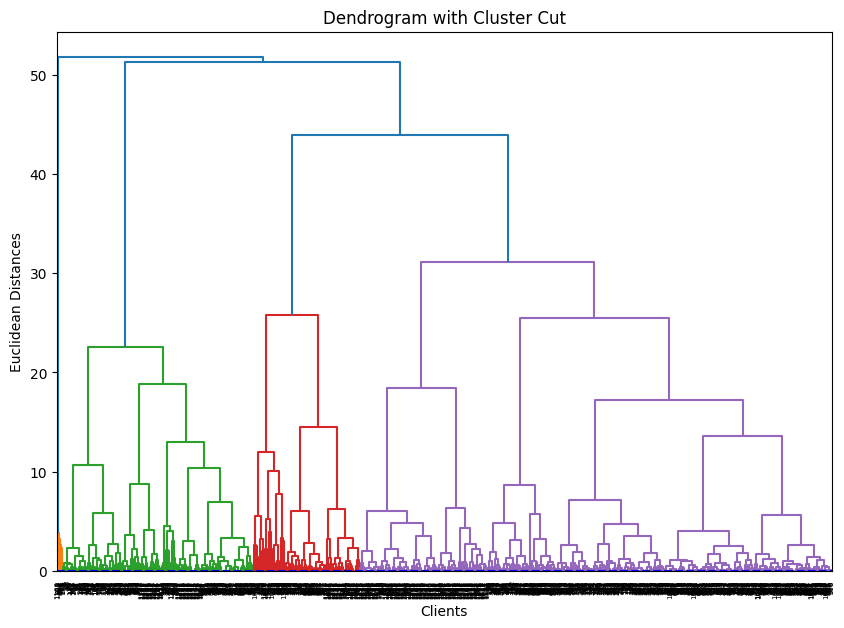

In [ ]:
# Visualizing the dendrogram with the cutting line
plt.figure(figsize=(10, 7))
plt.title('Dendrogram with Cluster Cut')
dendrogram(linkage_matrix)

# Draw the cutting line at height 0
plt.axhline(y=max_d, color='b', linestyle='--')  # Add red dashed line at cutting height
plt.xlabel('Clients')
plt.ylabel('Euclidean Distances')
plt.show()

## Interpreting the Dendrogram with Cluster Cut:##
**Number of Clusters:**

Based on the dendrogram and the provided Silhouette Score, it appears that three distinct clusters have been identified. The blue dashed line likely represents the cutoff point where the dendrogram was cut to form these clusters.

**Clusters and HIV Testing:**

Given the variables used in the clustering (Age, Sex, Marital status, Ever Tested, HIV Test 1, Ever had an HIV self test this year), it can be inferred that each cluster represents a group of clients with similar characteristics related to these variables.

**Cluster Formation and Labeling:**

Cluster 1: This cluster likely consists of individuals with a history of consistent negative HIV testing and regular self-testing. They may also have specific demographic characteristics (e.g., older, married individuals).

Cluster 2: This cluster might include individuals with mixed testing results or inconsistent testing patterns. They may also have a variety of demographic characteristics.

Cluster 3: This cluster could represent individuals who have tested positive for HIV or those with a limited history of testing. They may also have specific demographic characteristics associated with higher risk (e.g., younger, unmarried individuals).

**Cluster Analysis and Comparison:**

Cluster 1: This cluster likely represents individuals who are well-engaged in HIV prevention and care. They may have a lower risk of transmission or progression due to consistent testing and early intervention.

Cluster 2: This cluster might indicate a group of individuals who are less consistent in their HIV prevention behaviors. They may benefit from targeted interventions to improve their engagement with healthcare services.

Cluster 3: This cluster represents individuals who are at a higher risk of HIV transmission or progression. They may require immediate linkage to care and specialized interventions to address their specific needs.

**Comparison between clusters:**

Cluster 1 vs. Cluster 3: Cluster 1 may have a higher proportion of individuals with negative test results and regular testing behaviors, while Cluster 3 may have a higher proportion of individuals with positive test results or limited testing history.

Cluster 2 vs. Cluster 3: Cluster 2 may include individuals with inconsistent testing behaviors or those with negative test results but low engagement, while Cluster 3 may consist of individuals who have tested positive but haven't linked to care.

Overall, the clustering analysis provides valuable insights into the heterogeneity of HIV testing behavior and the potential need for targeted interventions to address the specific needs of different groups within the population.

## **Segmentation Using My Clusters:**

Based on the three clusters formed in the analysis, I can segment the data into meaningful groups that reflect different **testing behaviors**, **population types**, and **likelihood of linkage to care**. Here’s a breakdown of how each cluster might represent a distinct group:

#### **Cluster 1: Frequent Testers (Low Risk)**
- **Characteristics**:
  - Individuals in this cluster have **regular HIV testing patterns** and include those who are older, married, or have had negative results in the past.
  - They are likely more engaged with healthcare services and have tested frequently or self-tested this year.
  
- **Segmentation**:
  - **Testing Frequency**: High (frequent testing or self-testing).
  - **Key Population**: Likely low-risk, well-engaged individuals with regular access to care.
  - **Likelihood of Linkage to Care**: High. This group is likely already linked to care and follows up regularly.

#### **Cluster 2: Inconsistent Testers (Moderate Risk)**
- **Characteristics**:
  - This group shows **inconsistent testing behaviors**. They include individuals from various demographic backgrounds (e.g., single or married, younger individuals) who have tested in the past but do not regularly self-test.
  - Their risk might vary, but they could benefit from improved healthcare engagement.

- **Segmentation**:
  - **Testing Frequency**: Moderate (some individuals tested, some did not test or self-test).
  - **Key Population**: Mixed population with varying levels of engagement with healthcare.
  - **Likelihood of Linkage to Care**: Moderate. They may have gaps in regular testing but could benefit from awareness programs to ensure consistent care.

#### **Cluster 3: High-Risk Group (High Risk)**
- **Characteristics**:
  - This group consists of individuals who either tested positive for HIV or have not had any tests recently. They also include those with riskier behaviors or fewer resources to access healthcare, such as younger, unmarried individuals.
  
- **Segmentation**:
  - **Testing Frequency**: Low (minimal or no recent testing or self-testing).
  - **Key Population**: High-risk individuals with low engagement or access to healthcare.
  - **Likelihood of Linkage to Care**: Low. They are at a higher risk and may require immediate intervention to ensure linkage to care.

### **Targeted Insights for Each Segment:**

#### **Cluster 1: Frequent Testers (Low Risk)**
- **Targeted Insights**:
  - This group is likely already engaged with healthcare systems. However, they might benefit from **continued education** on HIV testing frequency and the importance of regular health checks, especially if they belong to key populations such as **older individuals** or **those in long-term relationships**.
  - **Action**: Continue routine testing and offer additional resources like **self-testing kits** to keep engagement high.

#### **Cluster 2: Inconsistent Testers (Moderate Risk)**
- **Targeted Insights**:
  - Individuals in this group could benefit from **targeted awareness campaigns** that encourage more regular testing and better healthcare engagement. This group might also benefit from **outreach efforts** aimed at improving self-testing rates or counseling services to help them understand the importance of consistent testing.
  - **Action**: Introduce **testing reminders**, **educational workshops**, and **self-testing kits** to make testing more accessible and consistent.

#### **Cluster 3: High-Risk Group (High Risk)**
- **Targeted Insights**:
  - This group is the most vulnerable and likely needs **immediate intervention**. They may not be testing or might have tested positive without linking to care. This group should be the focus of **intensive outreach efforts**, providing them with **testing opportunities**, **counseling**, and **immediate linkage to care**.
  - **Action**: Offer **targeted outreach programs**, **mobile testing units**, and **linkage-to-care services** to ensure they get the care they need. This group might also benefit from **psychosocial support** or **peer counseling** to engage them more effectively.



## Data Visualization: ##
Creating bar charts, pie charts, and histograms to display the distribution of key variables like HIV test results, sex, age, and ever tested before.

Using scatter plots, dendrograms, and heatmaps to visualize clusters and highlight their characteristics and separations.

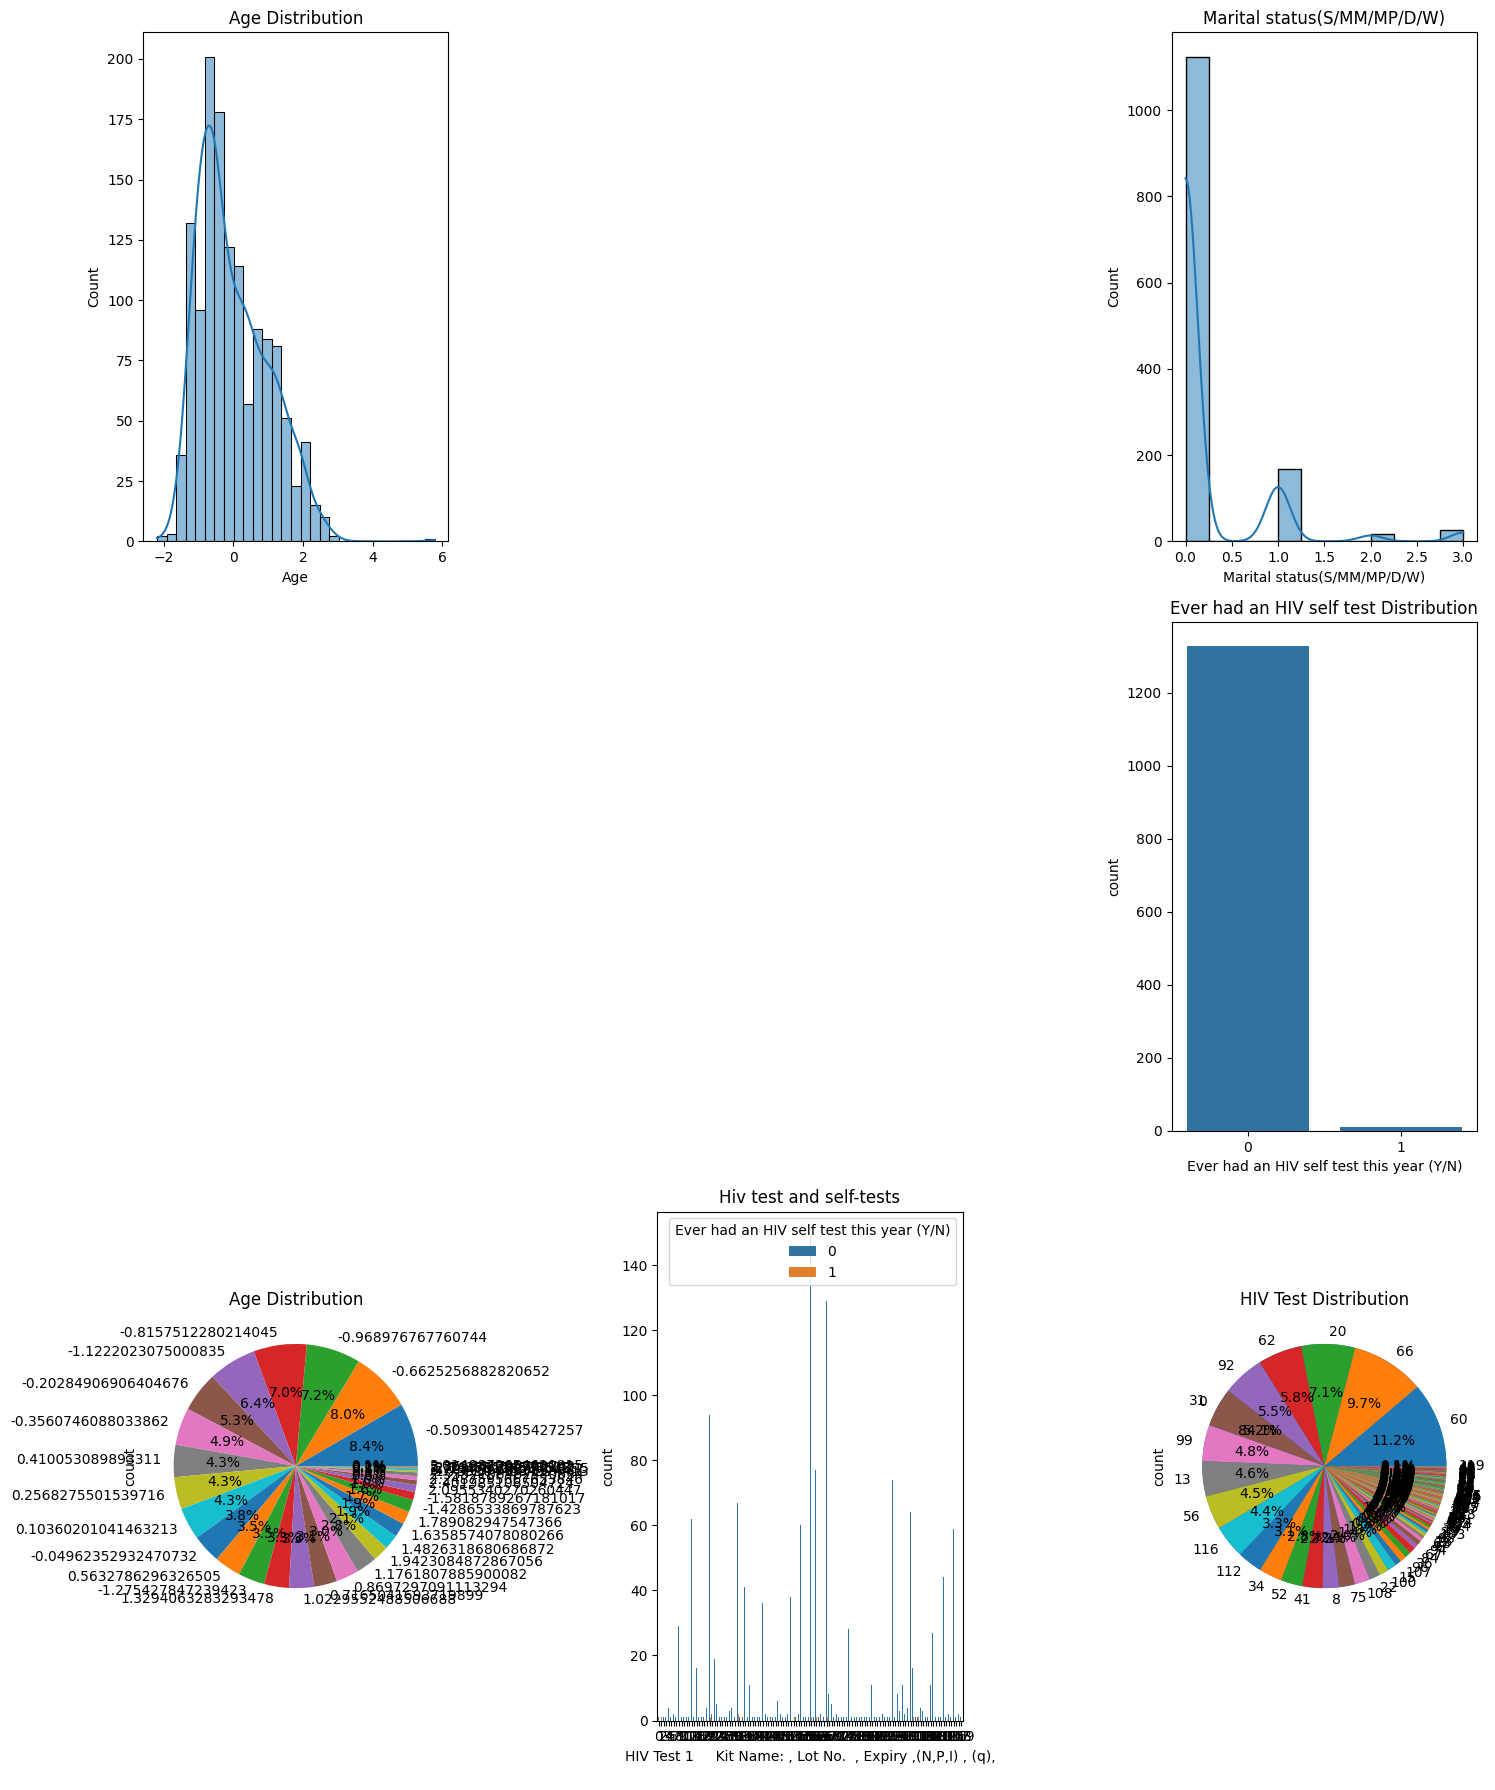

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of subplots with appropriate size
fig, axes = plt.subplots(3, 3, figsize=(15, 18))

# 1. Histogram for Age
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# 2. Histogram for Marital Status
sns.histplot(df['Marital status(S/MM/MP/D/W)'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Marital status(S/MM/MP/D/W)')


# 3. Barplot for number of referrals
sns.countplot(x='Ever had an HIV self test this year (Y/N)', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Ever had an HIV self test Distribution')

# 4. Pie chart plot Age
df['Age'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[2, 0])
axes[2, 0].set_title('Age Distribution')

# 5. Pie chart plot for Marital status(S/MM/MP/D/W)
df['Marital status(S/MM/MP/D/W)'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[2, 2])
axes[2, 2].set_title('Marital Status')

# 6. Pie chart plot for HIV Test
df['HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           '].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[2, 2])
axes[2, 2].set_title('HIV Test Distribution')

# 7. Hiv test and self-tests relationship
sns.countplot(x='HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           ', hue='Ever had an HIV self test this year (Y/N)', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Hiv test and self-tests')

# Hide any remaining unused axes (if any)
for i in range(3):
    for j in range(3):
        # Only delete the axes if they haven't been used
        if not axes[i,j].has_data():
            fig.delaxes(axes[i, j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


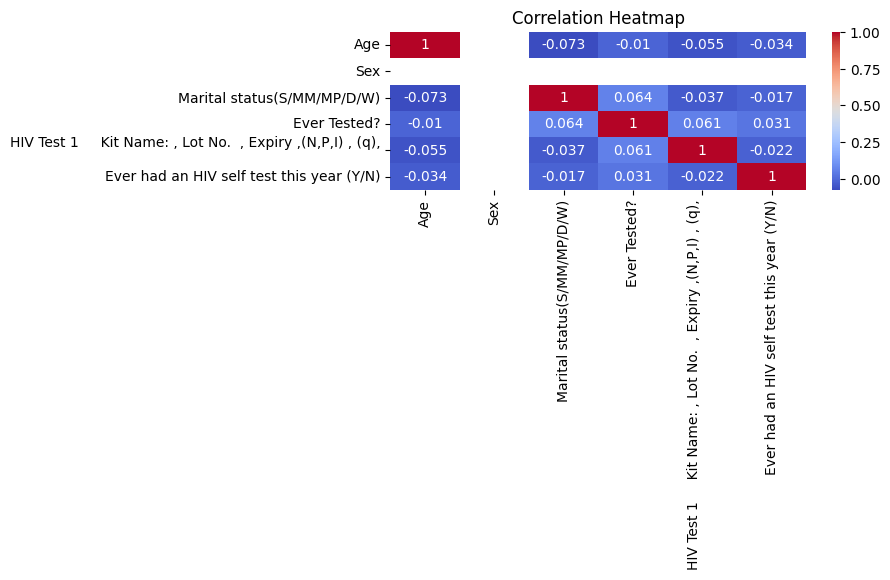

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of subplots with appropriate size
fig, axes = plt.subplots(5, 3, figsize=(20, 24))  # 5 rows, 3 columns

# Select only the subplot you need and remove the others
df_subset = df[['Age', 'Sex', 'Marital status(S/MM/MP/D/W)', 'Ever Tested?', 'HIV Test 1     Kit Name: , Lot No.  , Expiry ,(N,P,I) , (q),\n           ', 'Ever had an HIV self test this year (Y/N)']].copy()
corr_matrix = df_subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap')

# Remove unused subplots
for i in range(5):
    for j in range(3):
        if (i, j) != (1, 0):
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()
